# Алгоритмы интеллектуальной обработки больших объемов данных
# Котелевский Никита
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

# %load_ext pycodestyle_magic

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [118]:
# %%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def metric(self, X, Y):
        if self.metric == 'euclidean':
            return np.sqrt(((X - Y) ** 2).sum(axis=1))

    def fit_core(self, X, XX, y):
        YY = np.sum(self.centroids ** 2, axis=1, dtype=float)
        for i in range(self.max_iter):
            xy_dist = X.dot(self.centroids.T)
            dist_sqr = -2. * xy_dist + YY + XX.reshape(-1, 1)
            dist_sqr[dist_sqr < 0] = 0
            dist = np.sqrt(dist_sqr)
            self.labels = np.argmin(dist, axis=1)
            self.centroids = np.zeros_like(self.centroids, dtype=float)
            for j in range(self.k):
                m = X[self.labels == j]
                self.centroids[j] = np.sum(m, axis=0) / m.shape[0]

    def fit(self, X, y=None):
        """
        Процедура обучения
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0], dtype=int)
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        # выбираем центроиды
        XX = np.sum(X ** 2, axis=1, dtype=float)
        if self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]


        elif self.init == 'k-means':
            centroids = X[np.random.randint(low=0, high=X.shape[0])]
            centroids = centroids.reshape(-1, X.shape[1])
            k_cur = 1
            while (k_cur < self.k):
                YY = np.sum(centroids ** 2, axis=1, dtype=float)
                xy_dist = X.dot(centroids.T)
                dist_sqr = -2. * xy_dist + YY + XX.reshape(-1, 1)
                tot_sum = np.sum(dist_sqr, axis=1)
                norm = np.sum(tot_sum)
                cumsum = 0
                cr = np.random.uniform() * norm
                i = 0
                cumsum += tot_sum[i]
                while (cumsum < cr):
                    i += 1
                    cumsum += tot_sum[i]
                centroids = np.vstack((centroids, X[i]))
                k_cur += 1
            self.centroids = centroids

        self.fit_core(X, XX, y=None)  # общее для алгоритмов ядро
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        labels = np.zeros(X.shape[0], dtype=int)
        XX = ((X * 1.) ** 2).sum(axis=1)
        YY = ((self.centroids * 1.) ** 2).sum(axis=1)
        xy_dist = X.dot(self.centroids.T)
        dist_sqr = -2. * xy_dist + YY + XX.reshape(-1, 1)
        dist_sqr[dist_sqr < 0] = 0
        dist = np.sqrt(dist_sqr * 1.)
        labels = np.argmin(dist, axis=1)
        return labels


class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', b=10):
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.b = b

    def fit_core(self, X, XX, y):
        YY = np.sum(self.centroids ** 2, axis=1, dtype=float)
        for i in range(self.max_iter):
            xy_dist = X.dot(self.centroids.T)
            dist_sqr = -2. * xy_dist + YY + XX.reshape(-1, 1)
            dist_sqr[dist_sqr < 0] = 0
            dist = np.sqrt(dist_sqr)
            self.labels = np.argmin(dist, axis=1)
            self.centroids = np.zeros_like(self.centroids, dtype=float)
            for j in range(self.k):
                m = X[self.labels == j]
                self.centroids[j] = np.sum(m, axis=0) / m.shape[0]

    def fit(self, X_f, y=None):
        """
        Процедура обучения k-means-minibatch
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        self.labels = np.empty(self.b, dtype=int)
        self.centroids = np.empty((self.k, X_f.shape[1]))

        X = X_f[np.random.choice(X_f.shape[0], self.b, replace=False)]
        XX = (X ** 2).sum(axis=1, dtype=float)
        if self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        elif self.init == 'k-means':
            centroids = X[np.random.randint(low=0, high=X.shape[0])]
            centroids = centroids.reshape(-1, X.shape[1])
            k_cur = 1
            while (k_cur < self.k):
                YY = ((centroids * 1.) ** 2).sum(axis=1)
                xy_dist = X.dot(centroids.T)
                dist_sqr = -2. * xy_dist + YY + XX.reshape(-1, 1)
                tot_sum = np.sum(dist_sqr, axis=1)
                norm = np.sum(tot_sum)
                cumsum = 0
                cr = np.random.uniform() * norm
                i = 0
                cumsum += tot_sum[i]
                while (cumsum < cr):
                    i += 1
                    cumsum += tot_sum[i]
                centroids = np.vstack((centroids, X[i]))
                k_cur += 1
            self.centroids = centroids
        self.fit_core(X, XX, y=None)
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        labels = np.zeros(X.shape[0], dtype=int)
        XX = ((X * 1.) ** 2).sum(axis=1)
        YY = ((self.centroids * 1.) ** 2).sum(axis=1)
        xy_dist = X.dot(self.centroids.T)
        dist_sqr = -2. * xy_dist + YY + XX.reshape(-1, 1)
        dist_sqr[dist_sqr < 0] = 0
        dist = np.sqrt(dist_sqr * 1.)
        labels = np.argmin(dist, axis=1)
        return labels

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [119]:
from sklearn.datasets import make_blobs

In [120]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

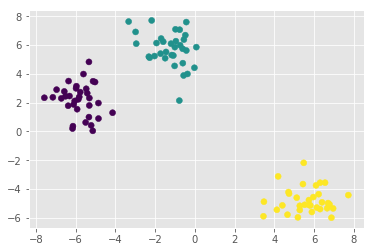

In [121]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [122]:
## Работоспособность MyKmeans

In [123]:
my_clf = MyKmeans(k=3, max_iter=300)
my_clf.fit(X)
my_clf.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

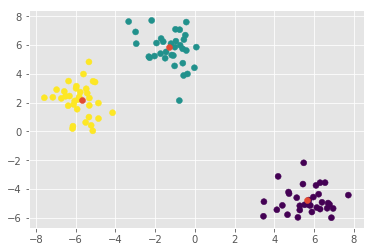

In [124]:
my = my_clf.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=my)
plt.scatter(my_clf.centroids[:, 0], my_clf.centroids[:, 1])

In [125]:
## Работоспособность MyKmeans++
my_clf = MyKmeans(k=3, init='k-means', max_iter=300)
my_clf.fit(X)
my_clf.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

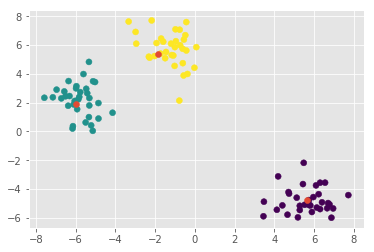

In [126]:
my = my_clf.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=my)
plt.scatter(my_clf.centroids[:, 0], my_clf.centroids[:, 1])

In [129]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, b=50, max_iter=100)
my_clf.fit(X)
my_clf.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

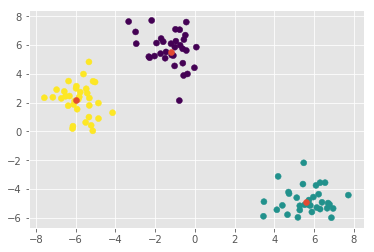

In [130]:
my = my_clf.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=my)
plt.scatter(my_clf.centroids[:, 0], my_clf.centroids[:, 1])

In [132]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, b=50, max_iter=100, init='k-means')
my_clf.fit(X)
my_clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

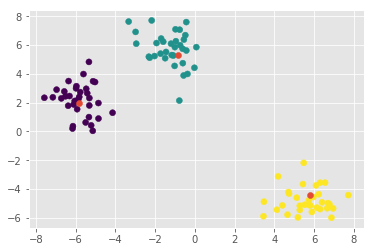

In [133]:
my = my_clf.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=my)
plt.scatter(my_clf.centroids[:, 0], my_clf.centroids[:, 1])

In [30]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3, max_iter=1000)
%time clf.fit(X)

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 30.6 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
% time clf.predict(X)

CPU times: user 1.16 ms, sys: 129 µs, total: 1.29 ms
Wall time: 1.13 ms


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
## Время выполнения алгоритма MyKmeans
my_clf = MyKmeans(k=3, max_iter=300)
% time my_clf.fit(X)

CPU times: user 28.9 ms, sys: 63 µs, total: 28.9 ms
Wall time: 28.1 ms


<__main__.MyKmeans instance at 0x7f1cd8d45560>

In [36]:
%time my_clf.predict(X)

CPU times: user 377 µs, sys: 40 µs, total: 417 µs
Wall time: 334 µs


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
## Время выполнения алгоритма MyKmeans++
my_clf = MyKmeans(k=3, init='k-means')
%time my_clf.fit(X)

CPU times: user 127 ms, sys: 0 ns, total: 127 ms
Wall time: 127 ms


<__main__.MyKmeans instance at 0x7f1cd8d45908>

In [42]:
%time my_clf.predict(X)

CPU times: user 285 µs, sys: 0 ns, total: 285 µs
Wall time: 226 µs


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, b=100, max_iter=100)
%time my_clf.fit(X)

CPU times: user 20.5 ms, sys: 38 µs, total: 20.6 ms
Wall time: 20.5 ms


<__main__.MiniBatchKMeans instance at 0x7f1cd8d454d0>

In [44]:
%time my_clf.predict(X)

CPU times: user 462 µs, sys: 48 µs, total: 510 µs
Wall time: 400 µs


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, b=100, max_iter=100, init='k-means')
%time my_clf.fit(X)

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 11.3 ms


<__main__.MiniBatchKMeans instance at 0x7f1cd8d47ea8>

In [47]:
%time my_clf.predict(X)

CPU times: user 283 µs, sys: 30 µs, total: 313 µs
Wall time: 248 µs


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
from sklearn.cluster import KMeans
import time

/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in divide
/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in divide
/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in less


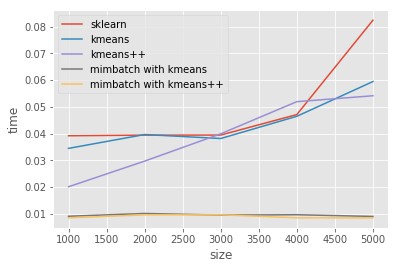

In [144]:
sizes = [1000, 2000, 3000, 4000, 5000]
times = []
clfs = [KMeans(n_clusters=3, max_iter=100), MyKmeans(k=3, max_iter=100), MyKmeans(k=3, max_iter=100, init='k-means')
    , MiniBatchKMeans(k=3, max_iter=100, b=50), MiniBatchKMeans(k=3, b=50, max_iter=100, init='k-means')]
for j, clf in enumerate(clfs):
    t = []
    for i, size in enumerate(sizes):
        X, y = make_blobs(n_samples=size, n_features=2, centers=3, cluster_std=1,
                          center_box=(-10.0, 10.0), shuffle=False, random_state=123)
        start = time.time()
        clf.fit(X)
        end = time.time() - start
        t.append(end)
    times.append(t)
plt.plot(sizes, times[0], label='sklearn')
plt.plot(sizes, times[1], label='kmeans')
plt.plot(sizes, times[2], label='kmeans++')
plt.plot(sizes, times[3], label='mimbatch with kmeans')
plt.plot(sizes, times[4], label='mimbatch with kmeans++')
plt.legend()
plt.xlabel('size')
plt.ylabel('time')
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [135]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [136]:
df_sns = df_sns.drop(columns=['gradyear', 'gender', 'age', 'friends'])

In [137]:
df_sns.shape

(30000, 36)

In [138]:
df_sns_normed = (df_sns - df_sns.mean(axis=0)) / df_sns.std(axis=0)

In [139]:
k = 9
b = 15000

In [140]:
## MyKMeans
my_clf = MyKmeans(k=k)
%time my_clf.fit(df_sns_normed.values)
y_pred = my_clf.predict(df_sns_normed.values)

for i, centr in enumerate(my_clf.centroids):
    print(i + 1, 'claster', 'size', my_clf.labels[my_clf.labels == i].size)
    print(df_sns_normed.columns[np.argsort(centr)][:])

CPU times: user 27.4 s, sys: 9.9 s, total: 37.3 s
Wall time: 18.7 s
(1, 'claster', 'size', 4408)
Index([u'hollister', u'shopping', u'cheerleading', u'abercrombie',
       u'basketball', u'baseball', u'softball', u'volleyball', u'hot',
       u'church', u'swimming', u'bible', u'football', u'mall', u'sports',
       u'cute', u'soccer', u'jesus', u'dress', u'sexy', u'blonde', u'dance',
       u'tennis', u'god', u'clothes', u'sex', u'kissed', u'hair', u'drugs',
       u'rock', u'drunk', u'death', u'music', u'die', u'marching', u'band'],
      dtype='object')
(2, 'claster', 'size', 4343)
Index([u'hollister', u'cheerleading', u'abercrombie', u'sports', u'marching',
       u'band', u'baseball', u'drugs', u'bible', u'death', u'softball',
       u'drunk', u'die', u'jesus', u'basketball', u'kissed', u'volleyball',
       u'football', u'rock', u'god', u'sex', u'swimming', u'blonde', u'church',
       u'music', u'tennis', u'soccer', u'hair', u'clothes', u'sexy', u'hot',
       u'dance', u'mall', u

In [142]:
## MyKMeans++
my_clf = MyKmeans(k=k, init='k-means')
%time my_clf.fit(df_sns_normed.values)
y_pred = my_clf.predict(df_sns_normed.values)

for i, centr in enumerate(my_clf.centroids):
    print(i + 1, 'claster', 'size', my_clf.labels[my_clf.labels == i].size)
    print(df_sns_normed.columns[np.argsort(centr)][:])

CPU times: user 42.4 s, sys: 15.4 s, total: 57.8 s
Wall time: 30.7 s
(1, 'claster', 'size', 947)
Index([u'hollister', u'abercrombie', u'sports', u'volleyball', u'basketball',
       u'tennis', u'mall', u'drugs', u'cheerleading', u'hot', u'baseball',
       u'soccer', u'drunk', u'shopping', u'sexy', u'cute', u'kissed', u'sex',
       u'softball', u'die', u'blonde', u'death', u'church', u'swimming',
       u'football', u'jesus', u'bible', u'hair', u'dance', u'god', u'dress',
       u'clothes', u'rock', u'music', u'band', u'marching'],
      dtype='object')
(2, 'claster', 'size', 4747)
Index([u'tennis', u'hollister', u'abercrombie', u'marching', u'drunk', u'die',
       u'drugs', u'band', u'kissed', u'hair', u'clothes', u'death', u'mall',
       u'shopping', u'cute', u'dress', u'sex', u'dance', u'hot', u'sexy',
       u'bible', u'cheerleading', u'god', u'music', u'jesus', u'blonde',
       u'church', u'swimming', u'rock', u'soccer', u'volleyball', u'softball',
       u'baseball', u'sports

In [110]:
## MyKMeans с MiniBatchMyKMeans
my_clf = MiniBatchKMeans(k=k, b=b)
%time my_clf.fit(df_sns_normed.values)
y_pred = my_clf.predict(df_sns_normed.values)

for i, centr in enumerate(my_clf.centroids):
    print(i + 1, 'claster', 'size', my_clf.labels[my_clf.labels == i].size)
    print(df_sns_normed.columns[np.argsort(centr)][:])

CPU times: user 9.39 s, sys: 3.47 s, total: 12.9 s
Wall time: 6.47 s
(1, 'claster', 'size', 1682)
Index([u'bible', u'jesus', u'church', u'volleyball', u'marching', u'tennis',
       u'hollister', u'softball', u'shopping', u'abercrombie', u'cheerleading',
       u'blonde', u'soccer', u'baseball', u'swimming', u'basketball', u'hot',
       u'band', u'football', u'god', u'dress', u'mall', u'sports', u'dance',
       u'death', u'cute', u'sexy', u'music', u'sex', u'clothes', u'rock',
       u'die', u'drugs', u'drunk', u'kissed', u'hair'],
      dtype='object')
(2, 'claster', 'size', 6902)
Index([u'shopping', u'football', u'basketball', u'mall', u'hair', u'cute',
       u'music', u'clothes', u'sports', u'band', u'swimming', u'softball',
       u'hot', u'volleyball', u'church', u'dance', u'soccer', u'baseball',
       u'rock', u'cheerleading', u'god', u'kissed', u'dress', u'hollister',
       u'drunk', u'abercrombie', u'die', u'marching', u'drugs', u'tennis',
       u'jesus', u'sex', u'sexy',

In [111]:
## MyKMeans++ с MiniBatchMyKMeans
my_clf = MiniBatchKMeans(k=k, b=b, init='k-means')
%time my_clf.fit(df_sns_normed.values)
y_pred = my_clf.predict(df_sns_normed.values)

for i, centr in enumerate(my_clf.centroids):
    print(i + 1, 'claster', 'size', my_clf.labels[my_clf.labels == i].size)
    print(df_sns_normed.columns[np.argsort(centr)][:])

CPU times: user 8.26 s, sys: 3 s, total: 11.3 s
Wall time: 5.64 s
(1, 'claster', 'size', 1460)
Index([u'die', u'marching', u'band', u'death', u'hollister', u'abercrombie',
       u'drugs', u'bible', u'shopping', u'kissed', u'drunk', u'cute', u'hair',
       u'clothes', u'sex', u'sexy', u'mall', u'dress', u'dance', u'jesus',
       u'god', u'rock', u'soccer', u'hot', u'blonde', u'music', u'swimming',
       u'cheerleading', u'church', u'tennis', u'sports', u'baseball',
       u'volleyball', u'softball', u'basketball', u'football'],
      dtype='object')
(2, 'claster', 'size', 455)
Index([u'jesus', u'marching', u'bible', u'soccer', u'volleyball', u'tennis',
       u'church', u'softball', u'blonde', u'swimming', u'shopping',
       u'cheerleading', u'abercrombie', u'god', u'baseball', u'hollister',
       u'hot', u'basketball', u'football', u'band', u'dance', u'death',
       u'dress', u'cute', u'sexy', u'mall', u'sports', u'rock', u'clothes',
       u'die', u'music', u'drunk', u'sex', u'

In [191]:
## Вывод
# Самым медленным оказался KMeans++
# Самые быстрые - MiniBatchKMeans
# Однако в данном случае кластеры получились одними и теми же в разных алгоритмах

# Но в общем случае:
# Если нас интересует первое приближение - хотя бы примерно понять структуру образующихся кластеров,
# то выгоднее использовать именно MiniBatch алгоритмы, потому что они позволяют не рассматривать всю выборку
# целиком
# Если же мы хотим понять "тонкую" структуру каждого кластера, то необходимо брать в рассмотрение
# все объекты выборки, и Batch'ами тут уже не обойтись.